In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
data = {

    "Soil_Texture": np.random.uniform(0, 100, 5000),  # Percentage of sand/silt/clay

    "pH": np.random.uniform(4, 9, 5000),             # Soil pH levels

    "Moisture_Content": np.random.uniform(5, 30, 5000),  # Moisture content in percentage

    "Organic_Matter": np.random.uniform(0, 10, 5000),    # Organic matter in percentage

    "Cation_Exchange_Capacity": np.random.uniform(5, 25, 5000),  # Meq/100g

    "Bulk_Density": np.random.uniform(1, 1.8, 5000),         # g/cm³

    "Electrical_Conductivity": np.random.uniform(0, 4, 5000),  # ds/m

    "Soil_Type": np.random.choice(["Sandy", "Loamy", "Clayey"], 5000)  # Soil Types

}
df = pd.DataFrame(data)
X = df.drop("Soil_Type", axis =1)
Y = df['Soil_Type']
encoder = OneHotEncoder(sparse_output = False,dtype = int)
y_encoded = encoder.fit_transform(Y.values.reshape(-1,1))
#print(y_encoded)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x_scaled_df = pd.DataFrame(x_scaled, columns= X.columns)
x_train, x_validate, x_test = np.split(X,[ int(.6*len(df)), int(.8*len(df))])
##x_train, x_test, y_train,y_test = train_test_split(x_scaled_df, y_encoded,test_size = 0.3, random_state = 42)
y_train ,y_validate,y_test = np.split(y_encoded, [int(.6* len(df)), int(.8*len(df))])
x_train = np.array(x_train)
y_train = np.array(y_train)

C:\Users\venu9\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


C:\Users\venu9\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/700
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3307 - loss: 1.4411
Epoch 2/700
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3215 - loss: 1.1633
Epoch 3/700
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3482 - loss: 1.1440
Epoch 4/700
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3181 - loss: 1.1323
Epoch 5/700
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3581 - loss: 1.1269
Epoch 6/700
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3330 - loss: 1.1539
Epoch 7/700
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3547 - loss: 1.1334
Epoch 8/700
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3436 - loss: 1.1284
Epoch 9/700
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3394 - loss: 1.1332
Epoch 10/700
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3179 - loss: 1.1730
Epoch 11/700
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3405 - loss: 1.1286
Epoch 12/700
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

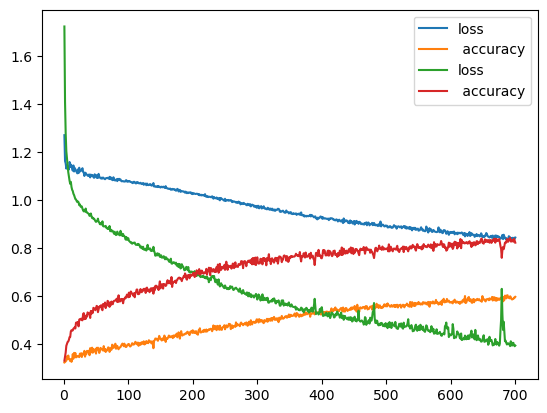

In [3]:
model = Sequential([
    Dense(64, activation = "relu", input_dim = x_train.shape[1]),
    #Dropout(0.3),
    Dense(32, activation ="relu"),
    #Dropout(0.3),
    Dense(3, activation ="softmax")])
model.compile(optimizer ="adam", loss = "categorical_crossentropy", metrics =[ 'accuracy'])
history = model.fit(x_train, y_train, epochs = 700)
lossPerEpoch = history.history['loss']
accuracyPerEpoch = history.history['accuracy']
x = np.array(list(range(1,701)))

val_history = model.fit(x_validate, y_validate, epochs = 700)
val_lossPerEpoch = val_history.history['loss']
val_accuracyPerEpoch = val_history.history['accuracy']


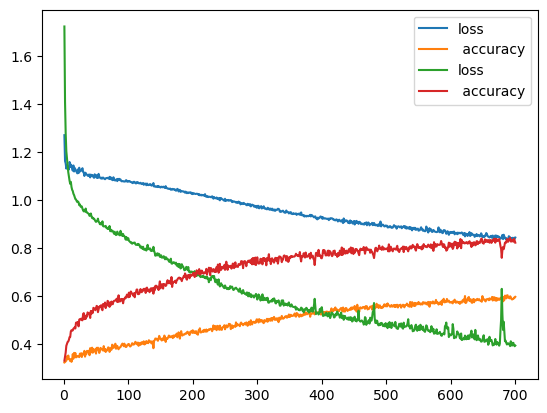

In [7]:
plt.plot(x,lossPerEpoch, label ="loss")
plt.plot(x, accuracyPerEpoch , label =" accuracy")
plt.legend()

plt.plot(x,val_lossPerEpoch, label ="loss")
plt.plot(x, val_accuracyPerEpoch , label =" accuracy")
plt.legend()

In [8]:
loss, accuracy  = model.evaluate(x_test,y_test)
print("accuracy = " , accuracy)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3234 - loss: 2.4952 
accuracy =  0.32100000977516174


In [185]:
import pickle
model_pkl_file = "dummy"
with open(model_pkl_file,"wb") as file:
    pickle.dump(model,file)

<!-- import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate sample data
X, Y = make_classification(n_samples=500, n_features=2, n_classes=3)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_encoded = np.eye(3)[Y]  # One-hot encode the labels

# Split data into train, validation, and test sets
X_train, X_validate, X_test, y_train, y_validate, y_test = train_test_split(X_scaled, y_encoded, test_size=0.4, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_validate, y_validate, test_size=0.5, random_state=42)

# Define a simple neural network model
model = Sequential([
    Dense(64, activation="relu", input_dim=X_train.shape[1]),
    Dense(32, activation="relu"),
    Dense(3, activation="softmax")
])

model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

# Function to compute loss for different parameter values
def compute_loss_for_params(w1, w2):
    # Modify model weights
    weights = model.get_weights()
    # Example: Set first weight to w1 and second weight to w2 (just for illustration)
    weights[0][0][0] = w1  # Set the first weight to w1
    weights[1][0] = w2  # Set the second weight to w2
    model.set_weights(weights)

    # Compute the loss for the current weights (on training data)
    loss = model.evaluate(X_train, y_train, verbose=0)
    return loss[0]  # Return loss value

# Generate grid of parameter values for w1 and w2
w1_vals = np.linspace(-1, 1, 50)
w2_vals = np.linspace(-1, 1, 50)
loss_values = np.zeros((len(w1_vals), len(w2_vals)))

# Calculate loss for each pair of w1, w2
for i, w1 in enumerate(w1_vals):
    for j, w2 in enumerate(w2_vals):
        loss_values[i, j] = compute_loss_for_params(w1, w2)

# Create 3D plot of the loss function
W1, W2 = np.meshgrid(w1_vals, w2_vals)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(W1, W2, loss_values.T, cmap="viridis")

# Labels and title
ax.set_xlabel("Weight 1 (w1)")
ax.set_ylabel("Weight 2 (w2)")
ax.set_zlabel("Loss")
ax.set_title("3D Loss Surface for Neural Network")

plt.show()

# Contour plot of the loss
plt.figure(figsize=(8, 6))
plt.contour(W1, W2, loss_values.T, levels=20, cmap="viridis")
plt.xlabel("Weight 1 (w1)")
plt.ylabel("Weight 2 (w2)")
plt.title("Contour Plot of Loss")
plt.colorbar(label="Loss")
plt.show()
 -->